<center><h1>Teclecom Churn Prediction </h1></center>

<div style='text-align:right'><B>Team members -:</B><br>
    Kaushik Mukhopadhyay(Leader)<br>
    Deba Shankar pati   (Team member)<br>
</div>

<center><h2>Steps to be followed to find out the important parameters and customer churn prediction&emsp;</h2></center>
<b>*Bussines understanding </b><br>
<B>*Exploratory Data Analysis</B><br> 
&emsp;&emsp;<B>*Understanding given Data and Loading Data set</B><br>
&emsp;&emsp;<B>*Data wrangling</B><br>
&emsp;&emsp;&emsp; Missing values treatment<BR>
&emsp;&emsp;&emsp; Outliers analysis<br>
&emsp;&emsp;&emsp; Feature engineering <br>
&emsp;&emsp;<B>*Finding important factors / variables impacting customer churn using Tree based random forest algorithm<B><BR>
&emsp;&emsp;<B>*Detailed analysis and visualization of important factors for customer churn</B> <br>
<B>*Churn prediction</B><br>
&emsp;&emsp;<B>Datapreparation for modelling.</B><br>
&emsp;&emsp;&emsp; Spliting into train and test( validation ) data .<br>
&emsp;&emsp;&emsp; Handeling class imbalance.<br>
&emsp;&emsp;&emsp; Feature scalling (Normalizing the data set)<br>
&emsp;&emsp;&emsp; Principle component analysis and Diamensionality reduction.<br>
&emsp;&emsp;<B>Model building and Evaluation</B><br> 
&emsp;&emsp;<B>Model evaluation on unseen test data</B><br>

<Center><h2>Bussiness understanding<h2><center>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

Our objective is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

<Center><h2>Exploratory Data Analysis</h2></Center>

<Center><h3>Understanding given Data and Loading Data set</h3></center>

We have the data set of a telecom company for 3 consicutive months of behavioral KPIs along with customer churning status in <b>train.csv.</b><BR>
We have a Data dictionary <b>(data_dictionary.csv)</b> which is explaining about different features in the data set.<BR>
We have a test or unseen data set <b>test.csv</b> using which we can predict the <B>churn status</B> with our trained Machine learning model.<BR>

<center><h3> Importing Libraries</h3></center>

In [77]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

<center><h3>Loading Dataset</h3></center>

In [78]:
traindf = pd.read_csv("train.csv")
traindf.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [79]:
testdf = pd.read_csv("test.csv")
testdf.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

<center><h3> Data Wrangling</h3></center>

In [80]:
traindf.shape

(69999, 172)

In [81]:
traindf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [82]:
traindf.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [83]:
numeric_columns=traindf.describe().columns
numeric_columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=163)

In [84]:
a = (traindf[numeric_columns].nunique()) # unique values in numeric columns
a

id                   69999
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
                     ...  
aon                   3455
aug_vbc_3g           10609
jul_vbc_3g           10257
jun_vbc_3g            9617
churn_probability        2
Length: 163, dtype: int64

In [85]:
# columns with only one value -
col_list = list(a[a<2].index.values)
col_list

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [86]:
# we can drop the columns with only one value

traindf=traindf.drop(col_list,axis=1)
traindf.shape

(69999, 162)

In [87]:
categorical_columns = traindf.columns.difference(numeric_columns)
categorical_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8'],
      dtype='object')

In [88]:
pd.DataFrame(traindf[categorical_columns].nunique()) # unique values in date columns


0
date_of_last_rech_6       30
date_of_last_rech_7       31
date_of_last_rech_8       31
date_of_last_rech_data_6  30
date_of_last_rech_data_7  31
date_of_last_rech_data_8  31
last_date_of_month_6       1
last_date_of_month_7       1
last_date_of_month_8       1

In [89]:
# we can drop the columns with only one value

traindf=traindf.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

#### Assumption-: Let's see how frequent customer has recharged (call and data) in 3 months. We will convert the date columns into 1 (recharge done) and 0 (no recharge) , as our primary concern is to find out the frequency of recharge rather than the absolute date value. Which can be a important factor for bussiness.

In [90]:
traindf[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].isnull().sum()

date_of_last_rech_6    1101
date_of_last_rech_7    1234
date_of_last_rech_8    2461
dtype: int64

In [91]:
traindf.loc[traindf['date_of_last_rech_6'].notnull(), 'date_of_last_rech_6'] = 1
traindf.loc[traindf['date_of_last_rech_6'].isnull(), 'date_of_last_rech_6'] = 0
traindf.loc[traindf['date_of_last_rech_7'].notnull(), 'date_of_last_rech_7'] = 1
traindf.loc[traindf['date_of_last_rech_7'].isnull(), 'date_of_last_rech_7'] = 0
traindf.loc[traindf['date_of_last_rech_8'].notnull(), 'date_of_last_rech_8'] = 1
traindf.loc[traindf['date_of_last_rech_8'].isnull(), 'date_of_last_rech_8'] = 0
traindf.loc[traindf['date_of_last_rech_data_6'].notnull(), 'date_of_last_rech_data_6'] = 1
traindf.loc[traindf['date_of_last_rech_data_6'].isnull(), 'date_of_last_rech_data_6'] = 0
traindf.loc[traindf['date_of_last_rech_data_7'].notnull(), 'date_of_last_rech_data_7'] = 1
traindf.loc[traindf['date_of_last_rech_data_7'].isnull(), 'date_of_last_rech_data_7'] = 0
traindf.loc[traindf['date_of_last_rech_data_8'].notnull(), 'date_of_last_rech_data_8'] = 1
traindf.loc[traindf['date_of_last_rech_data_8'].isnull(), 'date_of_last_rech_data_8'] = 0

In [92]:
traindf['date_of_last_rech_6'].value_counts()

1    68898
0     1101
Name: date_of_last_rech_6, dtype: int64

In [93]:
traindf['date_of_last_rech_data_6'].value_counts()

0    52431
1    17568
Name: date_of_last_rech_data_6, dtype: int64

In [94]:
categorical_columns = traindf.columns.difference(numeric_columns)
traindf[categorical_columns]

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0                       1                   1                   1   
1                       1                   1                   1   
2                       1                   1                   1   
3                       1                   1                   1   
4                       1                   1                   1   
...                   ...                 ...                 ...   
69994                   1                   1                   1   
69995                   1                   1                   1   
69996                   1                   1                   1   
69997                   1                   1                   1   
69998                   1                   1                   1   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                            0                        0   
1                            0                        1   
2                            0                        0   
3                            0                        0   
4                            1                        1   
...                        ...                      ...   
69994                        0                        1   
69995                        0                        0   
69996                        0                        0   
69997                        1                        1   
69998                        1                        0   

      date_of_last_rech_data_8  
0                            0  
1                            0  
2                            0  
3                            0  
4                            1  
...                        ...  
69994                        1  
69995                        0  
69996                        0  
69997                        1  
69998                        1  

[69999 rows x 6 columns]

In [95]:
traindf=traindf.drop('id',axis=1) # dropping the id column

In [96]:
traindf.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [97]:
7132*100/(7132+62867)

10.188716981671167

<B>Observation -: We can see there is class imbalance as only 10 % of total customers are churning , which we will handle using oversampling technique SMOTE .</B>

<center><h4>Missing value treatment</h4></center>

In [98]:
a = traindf.isnull().sum()*100/len(traindf) # calculate percent of missing data in each column
a[a>0]

onnet_mou_6          3.954342
onnet_mou_7          3.838626
onnet_mou_8          5.290076
offnet_mou_6         3.954342
offnet_mou_7         3.838626
                      ...    
night_pck_user_7    74.478207
night_pck_user_8    73.689624
fb_user_6           74.902499
fb_user_7           74.478207
fb_user_8           73.689624
Length: 108, dtype: float64

<B>Assumption-: From the business problem, we can assume the missing value of a column here actually implies usage/recharge value of '0'.As it does not change the fact of the analysis. So, we can impute the missing values as 0.</B>

In [99]:
col_list = list(a[a>0].index.values)
traindf[col_list] = traindf[col_list].fillna(value=0, axis=1)

In [100]:
a = traindf.isnull().sum()*100/len(traindf) # calculate percent of missing data in each column
a[a>0].shape

(0,)

In [101]:
traindf.shape

(69999, 158)

<center><h4>Outliers analysis</h4></center>

In [102]:
def outlier_detect(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_outlier = sum(df[col] < (df[col].quantile(0.25) - 1.5 * IQR))
    upper_outlier = sum(df[col] > (df[col].quantile(0.75) + 1.5 * IQR))
    total_outlier = lower_outlier + upper_outlier
    outlier_percent = round((lower_outlier + upper_outlier) * 100 / len(df[col]), 2)
    return outlier_percent


# This function will calculate outlier percentage of each column
for column in traindf.select_dtypes(include=['int64', 'float64']).columns:
    x = outlier_detect(traindf, col=column)
    print("\n" + column + " : " + str(x))


arpu_6 : 5.79

arpu_7 : 5.74

arpu_8 : 5.48

onnet_mou_6 : 12.05

onnet_mou_7 : 12.43

onnet_mou_8 : 12.5

offnet_mou_6 : 8.61

offnet_mou_7 : 8.97

offnet_mou_8 : 8.93

roam_ic_mou_6 : 19.39

roam_ic_mou_7 : 14.82

roam_ic_mou_8 : 14.43

roam_og_mou_6 : 19.5

roam_og_mou_7 : 14.81

roam_og_mou_8 : 14.3

loc_og_t2t_mou_6 : 10.69

loc_og_t2t_mou_7 : 10.64

loc_og_t2t_mou_8 : 10.65

loc_og_t2m_mou_6 : 8.49

loc_og_t2m_mou_7 : 8.51

loc_og_t2m_mou_8 : 8.49

loc_og_t2f_mou_6 : 16.15

loc_og_t2f_mou_7 : 16.06

loc_og_t2f_mou_8 : 16.26

loc_og_t2c_mou_6 : 18.98

loc_og_t2c_mou_7 : 20.32

loc_og_t2c_mou_8 : 21.23

loc_og_mou_6 : 8.47

loc_og_mou_7 : 8.6

loc_og_mou_8 : 8.46

std_og_t2t_mou_6 : 18.25

std_og_t2t_mou_7 : 18.26

std_og_t2t_mou_8 : 18.57

std_og_t2m_mou_6 : 15.56

std_og_t2m_mou_7 : 15.68

std_og_t2m_mou_8 : 16.15

std_og_t2f_mou_6 : 11.64

std_og_t2f_mou_7 : 10.79

std_og_t2f_mou_8 : 10.74

std_og_mou_6 : 14.66

std_og_mou_7 : 14.94

std_og_mou_8 : 15.24

isd_og_mou_6 : 4.76

i

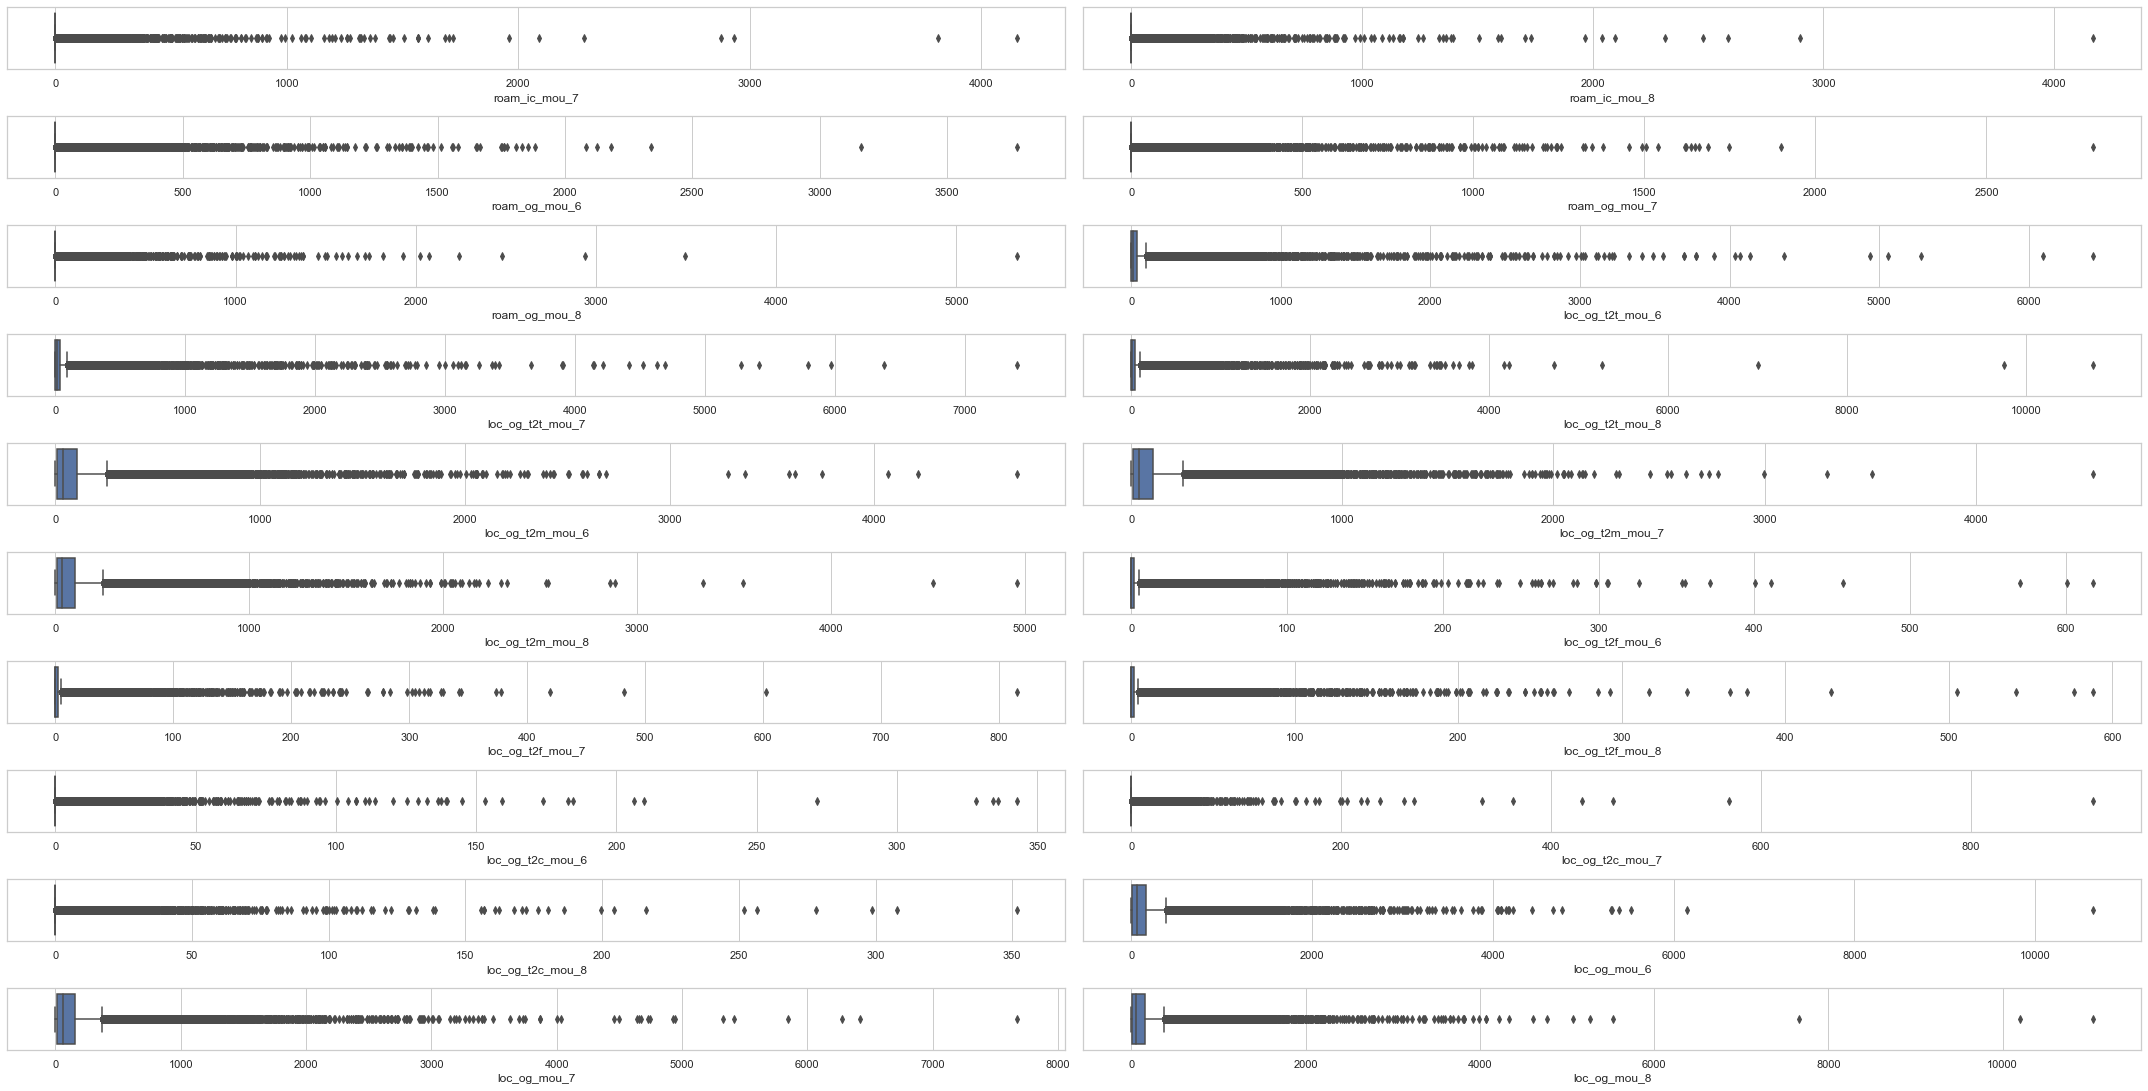

In [103]:
fig=plt.subplots(figsize=(30,30))

for i, feature in enumerate(list(traindf.columns)[10:30]):
    plt.subplot(20, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(traindf[feature])
    plt.tight_layout()

<B>Observation-:<br>
 We can see pretty much all the attributes are having outliers , if we drop the rows which are causing them we will loose a significant amount of information.</B><br> 
<B>And  in many cases, upper value of whisker in BOX-Whisker plot is near 0. If we try to flatten the outliers with a maximum value, we may risk loosing important values. Rather we will do a Standardrd scaling before model fit to handle this problem.</B><br>

In [104]:
traindf.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       ...   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7  \
count  ...  69999.000000  69999.000000  69999.000000  69999.000000   
mean   ...      0.081444      0.085487      0.229975      0.232132   
std    ...      0.634547      0.680035      0.420819      0.422196   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     33.000000     41.000000      1.000000      1.000000   

          fb_user_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.00000   
mean       0.234246   1220.639709     68.108597     65.935830     60.07674   
std        0.423530    952.426321    269.328659    267.899034    257.22681   
min        0.000000    180.000000      0.000000      0.000000      0.00000   
25%        0.000000    468.000000      0.000000      0.000000      0.00000   
50%        0.000000    868.000000      0.000000      0.000000      0.00000   
75%        0.000000   1813.000000      0.000000      0.000000      0.00000   
max        1.000000   4337.000000  12916.220000   9165.600000  11166.21000   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 152 columns]

<center><h3>Feature engineering</h3></center>

<center><B>Deriving  total_monthly_freq,total_amt,high_value_customer feature from KPIs of individual months</B></center> 

In [105]:
#convert recharge date column to numeric
traindf[categorical_columns] = traindf[categorical_columns].astype('float')

traindf[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_last_rech_6       69999 non-null  float64
 1   date_of_last_rech_7       69999 non-null  float64
 2   date_of_last_rech_8       69999 non-null  float64
 3   date_of_last_rech_data_6  69999 non-null  float64
 4   date_of_last_rech_data_7  69999 non-null  float64
 5   date_of_last_rech_data_8  69999 non-null  float64
dtypes: float64(6)
memory usage: 3.2 MB


<AxesSubplot:xlabel='total_monthly_freq', ylabel='count'>

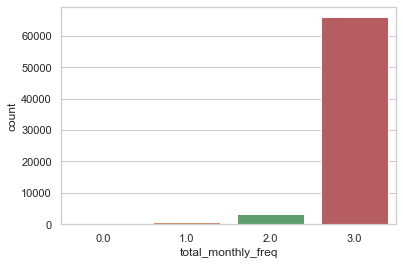

In [106]:
traindf['total_monthly_freq'] = traindf['date_of_last_rech_6']+traindf['date_of_last_rech_7']+traindf['date_of_last_rech_8']
sns.countplot(traindf['total_monthly_freq'])

In [107]:
## Selection of High Value customers

In [108]:
traindf['total_amt'] = traindf['total_rech_amt_6']+traindf['total_rech_data_6']+\
                    traindf['total_rech_amt_7']+traindf['total_rech_data_7']+\
                    traindf['total_rech_amt_8']+traindf['total_rech_data_8']

In [109]:
traindf['total_amt'].describe([0.25,0.5,0.75])


count     69999.000000
mean        976.363662
std        1106.790311
min           0.000000
25%         361.000000
50%         694.000000
75%        1247.000000
max      120845.000000
Name: total_amt, dtype: float64

In [110]:
# we can consider highest quartile as high value customer
traindf['high_value_customer'] = np.where(traindf['total_amt'] > traindf['total_amt'].quantile(0.75), 1 , 0)

In [111]:
traindf.shape

(69999, 161)

In [112]:
traindf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 161 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    arpu_6                    float64
 1    arpu_7                    float64
 2    arpu_8                    float64
 3    onnet_mou_6               float64
 4    onnet_mou_7               float64
 5    onnet_mou_8               float64
 6    offnet_mou_6              float64
 7    offnet_mou_7              float64
 8    offnet_mou_8              float64
 9    roam_ic_mou_6             float64
 10   roam_ic_mou_7             float64
 11   roam_ic_mou_8             float64
 12   roam_og_mou_6             float64
 13   roam_og_mou_7             float64
 14   roam_og_mou_8             float64
 15   loc_og_t2t_mou_6          float64
 16   loc_og_t2t_mou_7          float64
 17   loc_og_t2t_mou_8          float64
 18   loc_og_t2m_mou_6          float64
 19   loc_og_t2m_mou_7          float64
 20   loc_

<center><h4>Merging the KPIs of individual months (Data transformation for finding out important factors)</h4></center>


In [113]:
traindf_cpy=traindf

In [114]:
numeric_columns=list(traindf_cpy.describe().columns)
colset=set()
three_months_kpi=[i for i in numeric_columns if i[-1] in ['6','7','8']]
three_months_kpi
for i in three_months_kpi:
    colset.add(i[:-2])
print(colset)

{'total_rech_data', 'std_og_t2t_mou', 'loc_og_t2t_mou', 'loc_ic_mou', 'std_og_t2f_mou', 'loc_ic_t2t_mou', 'total_rech_num', 'count_rech_3g', 'av_rech_amt_data', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'total_og_mou', 'sachet_2g', 'monthly_2g', 'vol_2g_mb', 'arpu_3g', 'std_ic_t2f_mou', 'last_day_rch_amt', 'roam_ic_mou', 'onnet_mou', 'loc_ic_t2m_mou', 'roam_og_mou', 'std_og_mou', 'loc_ic_t2f_mou', 'arpu', 'loc_og_t2m_mou', 'max_rech_amt', 'isd_ic_mou', 'std_og_t2m_mou', 'offnet_mou', 'date_of_last_rech_data', 'loc_og_mou', 'spl_og_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'ic_others', 'fb_user', 'monthly_3g', 'og_others', 'night_pck_user', 'total_rech_amt', 'total_ic_mou', 'count_rech_2g', 'isd_og_mou', 'spl_ic_mou', 'date_of_last_rech', 'arpu_2g', 'vol_3g_mb', 'sachet_3g', 'max_rech_data', 'std_ic_mou'}


In [115]:
for j in colset:
    traindf_cpy[j]=0
    for i in ['6','7','8']:
        traindf_cpy[j]=traindf_cpy[j]+traindf_cpy[j+'_'+i]

In [116]:
traindf_cpy=traindf_cpy.drop(three_months_kpi,axis=1)

In [117]:
traindf_cpy.shape

(69999, 59)

<center><h3>Finding important factors using Tree based algorithm RandomForest classifier </h3></center>


In [118]:
from sklearn.preprocessing import StandardScaler 

In [119]:
collist=traindf_cpy.columns
collist=collist.difference(['churn_probability'])
traindf_cpy[collist]=StandardScaler().fit_transform(traindf_cpy[collist])

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
randomforestC=RandomForestClassifier(max_depth=7, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=750, n_jobs=-1,
                       random_state=42)
Y=traindf_cpy.pop('churn_probability')
X=traindf_cpy
randomforestC.fit(X,Y)

RandomForestClassifier(max_depth=7, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=750, n_jobs=-1,
                       random_state=42)

In [121]:
randomforestC.feature_importances_

array([1.21131101e-02, 3.00381324e-03, 2.42590069e-04, 3.31981869e-03,
       8.54864377e-02, 4.41508674e-03, 6.53517692e-05, 1.17015981e-02,
       3.31124074e-03, 1.12499077e-02, 1.29297628e-01, 1.75796055e-04,
       4.36662838e-02, 9.05852703e-03, 1.88723496e-03, 1.25423640e-02,
       6.48579460e-03, 5.05132307e-04, 2.62101727e-02, 1.96448964e-04,
       1.75361772e-04, 4.91977773e-03, 1.95389024e-03, 1.29999740e-03,
       3.82544805e-02, 3.42254538e-02, 2.10798595e-03, 9.10488286e-02,
       4.98733518e-02, 5.97281957e-03, 2.69683247e-02, 7.77043836e-03,
       2.12277201e-02, 2.89398509e-02, 5.88143675e-04, 2.60338688e-03,
       3.84150455e-03, 1.72015019e-02, 3.10609939e-02, 2.13954821e-03,
       5.11057860e-04, 1.27968980e-03, 2.78391993e-04, 1.59164005e-02,
       5.98905767e-04, 7.62127185e-03, 0.00000000e+00, 4.63133034e-03,
       1.12652898e-01, 1.49816959e-03, 7.87158231e-04, 4.36026047e-03,
       9.37838473e-02, 3.05595627e-03, 3.81226974e-03, 7.84980020e-06,
      

In [122]:
importancedataframe=pd.DataFrame(randomforestC.feature_importances_,X.columns)
importancedataframe.columns=['feature importance']

In [123]:
importancedataframe.sort_values(by='feature importance',ascending=False)

feature importance
loc_ic_mou                        0.129298
total_ic_mou                      0.112653
date_of_last_rech                 0.093784
loc_ic_t2m_mou                    0.091049
total_monthly_freq                0.085486
roam_og_mou                       0.049873
loc_ic_t2t_mou                    0.043666
last_day_rch_amt                  0.038254
roam_ic_mou                       0.034225
loc_og_mou                        0.031061
max_rech_amt                      0.028940
loc_ic_t2f_mou                    0.026968
total_og_mou                      0.026210
loc_og_t2m_mou                    0.021228
date_of_last_rech_data            0.017202
fb_user                           0.015916
av_rech_amt_data                  0.012542
aon                               0.012113
total_rech_data                   0.011702
loc_og_t2t_mou                    0.011250
max_rech_data                     0.009403
total_rech_num                    0.009059
arpu                              0.007770
og_others                         0.007621
loc_og_t2f_mou                    0.006486
std_og_mou                        0.005973
vol_2g_mb                         0.004920
total_rech_amt                    0.004631
total_amt                         0.004415
spl_ic_mou                        0.004360
offnet_mou                        0.003842
vol_3g_mb                         0.003812
jun_vbc_3g                        0.003320
std_og_t2t_mou                    0.003311
arpu_2g                           0.003056
aug_vbc_3g                        0.003004
std_ic_mou                        0.002694
std_og_t2m_mou                    0.002603
spl_og_mou                        0.002140
onnet_mou                         0.002108
arpu_3g                           0.001954
count_rech_3g                     0.001887
count_rech_2g                     0.001498
std_ic_t2f_mou                    0.001300
std_ic_t2m_mou                    0.001280
isd_og_mou                        0.000787
monthly_3g                        0.000599
isd_ic_mou                        0.000588
std_ic_t2t_mou                    0.000511
loc_og_t2c_mou                    0.000505
ic_others                         0.000278
jul_vbc_3g                        0.000243
sachet_2g                         0.000196
std_og_t2f_mou                    0.000176
monthly_2g                        0.000175
high_value_customer               0.000065
sachet_3g                         0.000008
night_pck_user                    0.000000

<center><h3> Analysis and visualization of important factors</h3></center>

In [124]:
predictors = list(traindf.describe().columns)
predictors.remove('churn_probability')
predictors

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

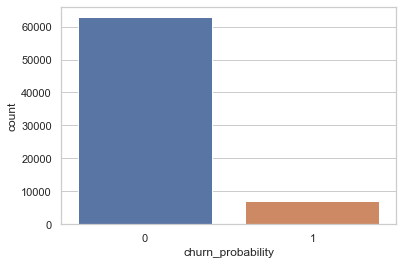

In [125]:
sns.countplot( x = traindf['churn_probability'])

<AxesSubplot:ylabel='Frequency'>

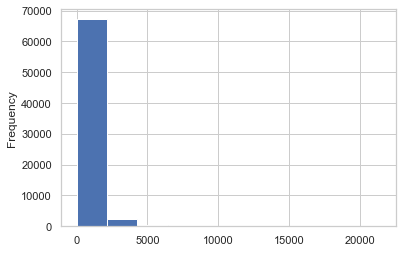

In [126]:
traindf.total_ic_mou.plot.hist()

In [127]:
def multivariate_numeric(df, col, groupby, classify=None, IQR_scale = 1.75):
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        min_y = df[col].quantile(0.01) - 0.1 * IQR
        max_y = df[col].quantile(0.75) + IQR_scale * IQR
        sns.set(style="whitegrid")
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
        ax[0].set_title("Box plot ")
        sns.boxplot(x=groupby, y=col, palette="pastel", data=df, ax=ax[0])
        ax[0].set(ylim=(min_y, max_y))
        ax[1].set_title("Box Plot showing behavioral patterns of High Value Customer")
        sns.boxplot(x=classify, y=col, palette="pastel", data=df, hue=groupby, ax=ax[1])
        ax[1].set(ylim=(min_y, max_y))
        plt.show()


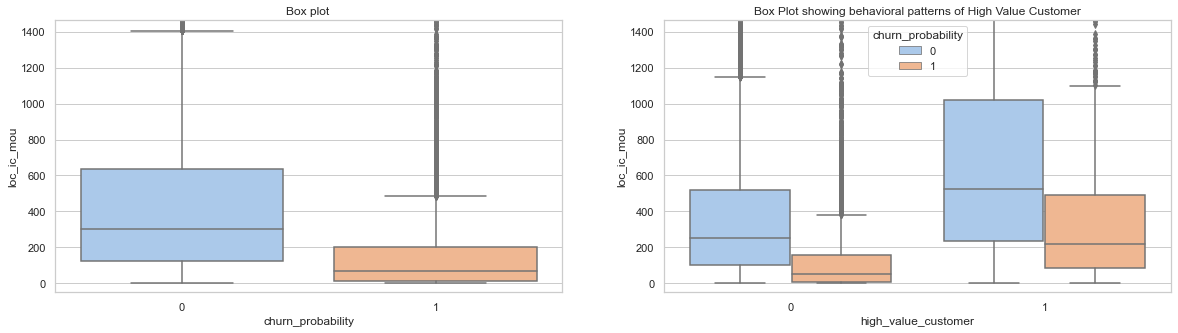

In [128]:

multivariate_numeric(traindf, col='loc_ic_mou', groupby='churn_probability', classify='high_value_customer')

### Local Incoming Call Minutes was the most important predictors and as expected, the customers with lower incoming calls have more probability to churn. This finding is consistent in high value customers also.

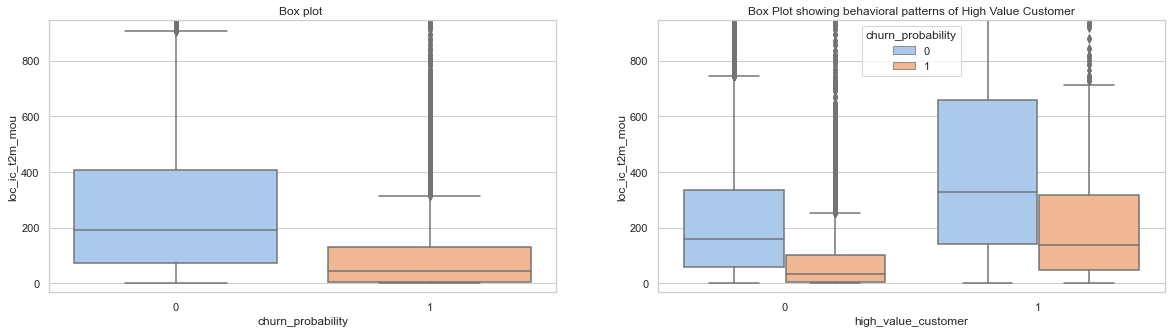

In [129]:
multivariate_numeric(traindf, col='loc_ic_t2m_mou', groupby='churn_probability', classify='high_value_customer')

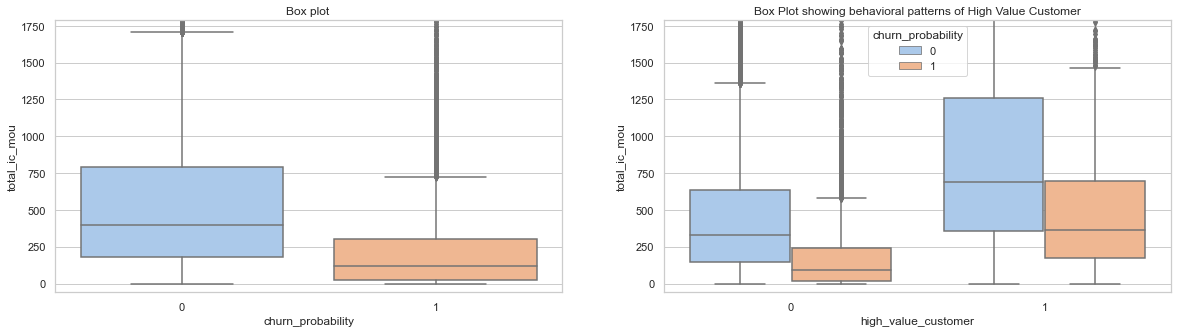

In [130]:
multivariate_numeric(traindf, col='total_ic_mou', groupby='churn_probability', classify='high_value_customer')

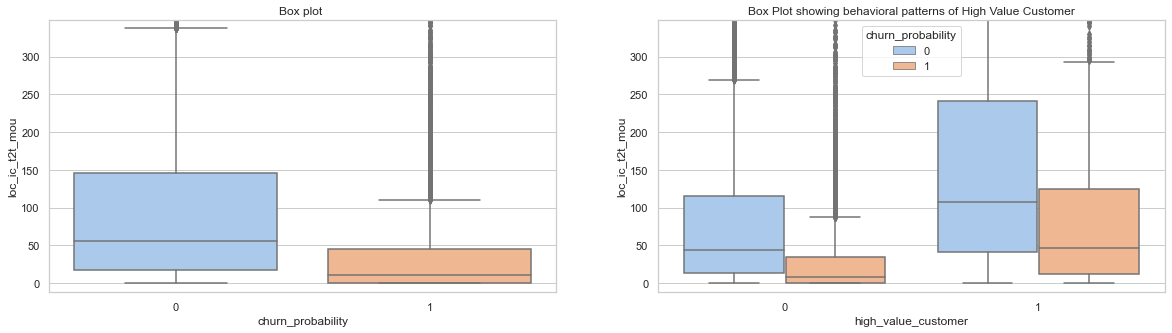

In [131]:
multivariate_numeric(traindf, col='loc_ic_t2t_mou', groupby='churn_probability', classify='high_value_customer')

#### Observation: Same finding is applicable for other incoming call usage parameters too.

<AxesSubplot:xlabel='churn_probability', ylabel='total_monthly_freq'>

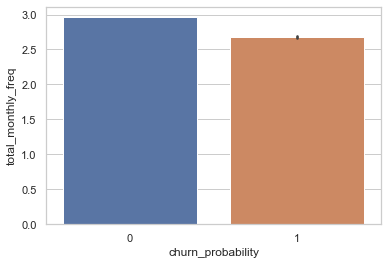

In [132]:
sns.barplot(data=traindf, y='total_monthly_freq', x='churn_probability')

#### Observation:  The customers who have recharged every month in preeceding three months, they are less likely to churn

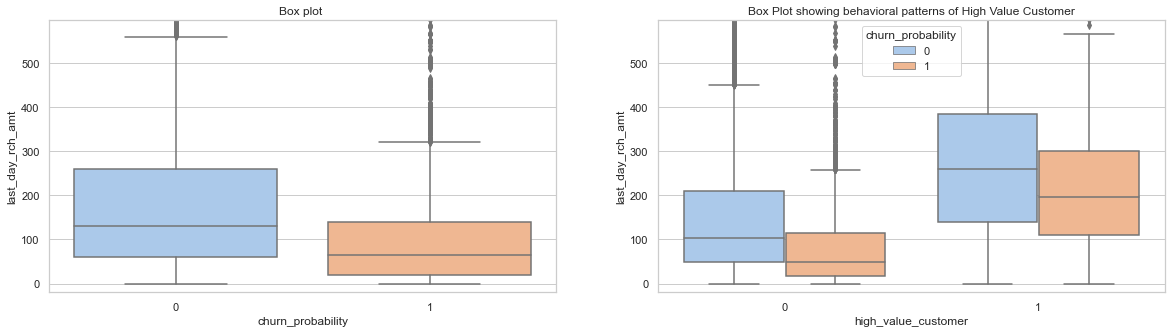

In [133]:
multivariate_numeric(traindf, col='last_day_rch_amt', groupby='churn_probability', classify='high_value_customer')

#### Observation:  Customers who have recharged with more than Rs.100/- are less likely to churn. For high value customers, the cut-off value is approximately 300.

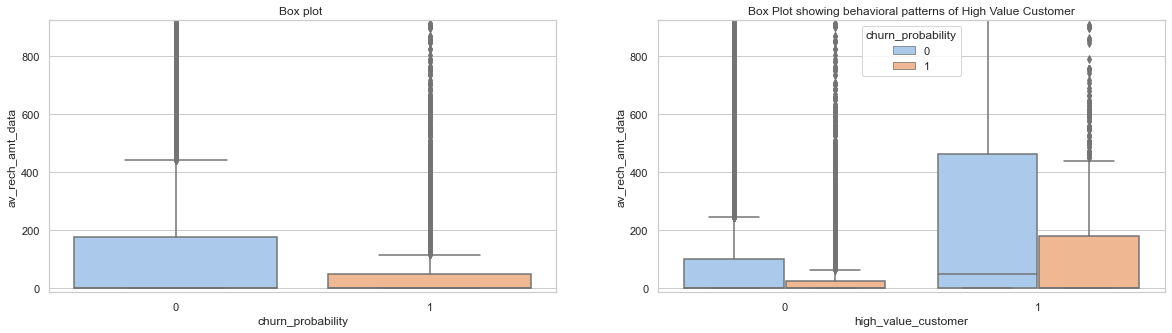

In [134]:
multivariate_numeric(traindf, col='av_rech_amt_data', groupby='churn_probability', classify='high_value_customer', IQR_scale=5)

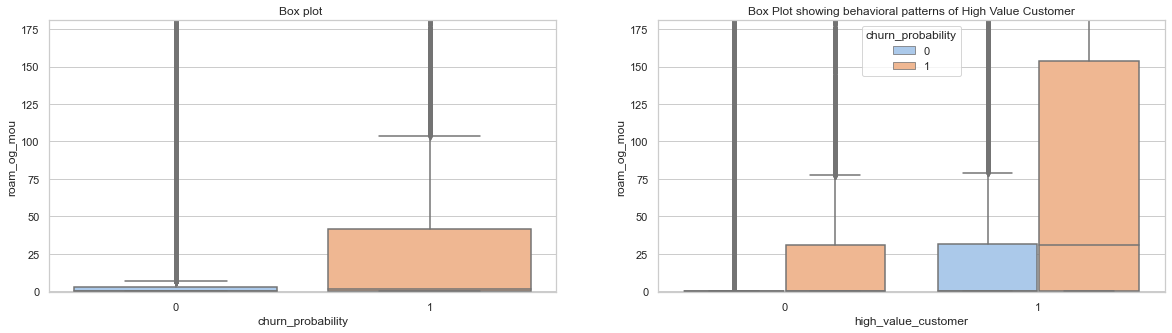

In [135]:
multivariate_numeric(traindf, col='roam_og_mou', groupby='churn_probability', classify='high_value_customer', IQR_scale=30)

#### Observation:  Quite astonishingly, users with more outgoing minutes while roaming show higher churn probability

<AxesSubplot:xlabel='churn_probability', ylabel='fb_user'>

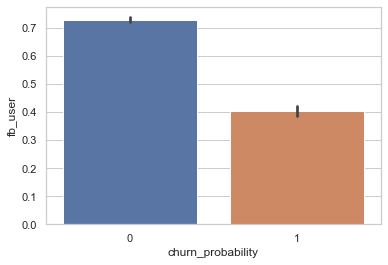

In [136]:
sns.barplot(data=traindf, y='fb_user', x='churn_probability')

#### Observation: Users using other services have lesser chance to churn

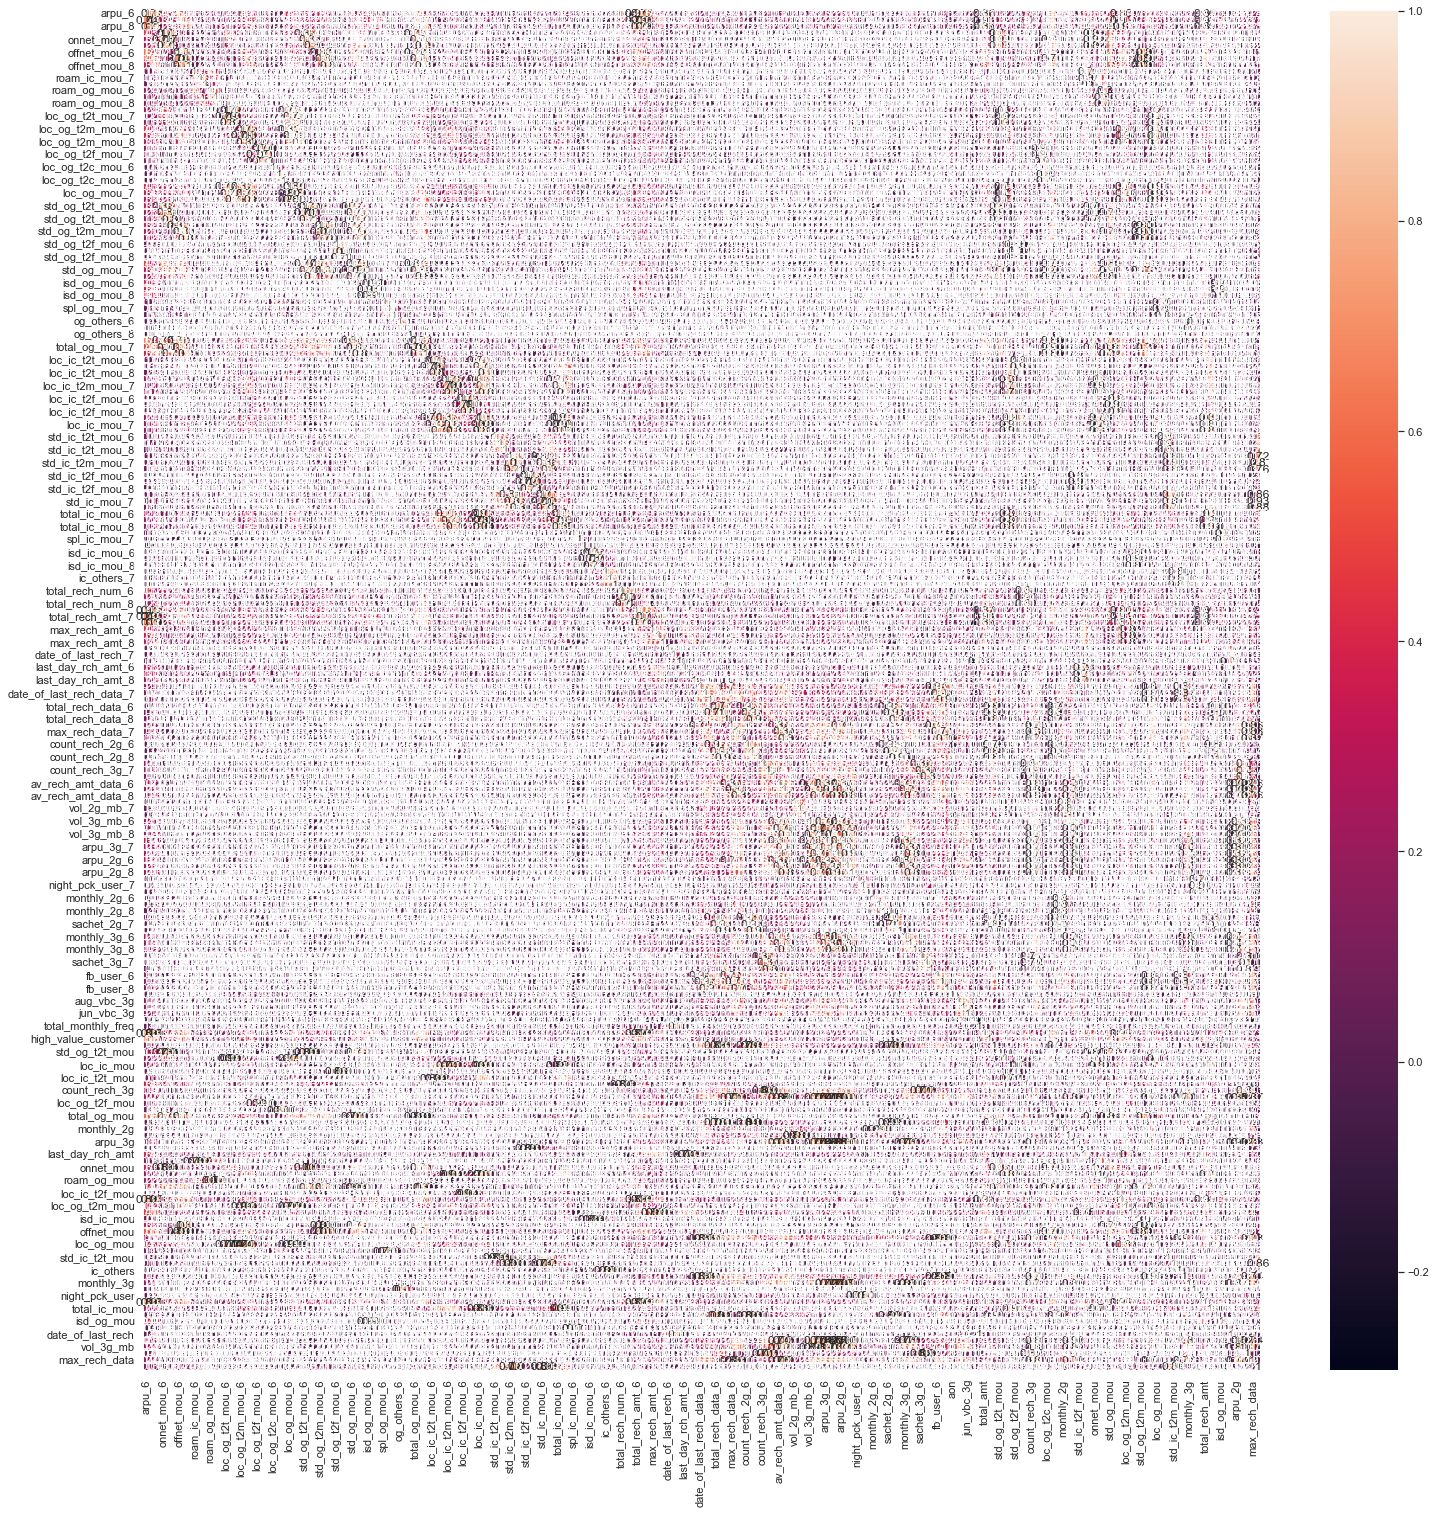

In [137]:
plt.figure(figsize=(25,25))
sns.heatmap(traindf.corr(),annot = True)
plt.show()

<AxesSubplot:xlabel='high_value_customer', ylabel='count'>

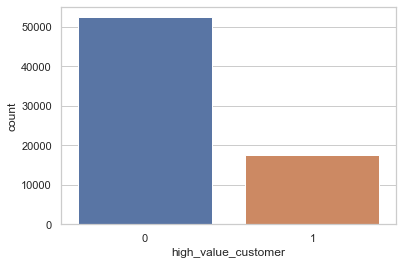

In [138]:
sns.countplot(traindf['high_value_customer'])

In [139]:
traindf.shape

(69999, 212)

<center><h2>Churn prediction</h2></center>

<center><h3>Data preparation for modelling.</h3></center>

<center><h4>Spliting into train and test( validation ) data</h4></center>

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X = traindf.drop(['churn_probability'], axis=1)
y = traindf['churn_probability']
X.shape, y.shape

((69999, 211), (69999,))

In [142]:
y.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

<center><h4>Handeling class imbalance.</h4></center>

 <B>Consideration-: We have seen there is class imbalance as only 10 % of total customers are churning , which we will handle using oversampling technique SMOTE .</B>

In [144]:
from imblearn.over_sampling import SMOTE

In [145]:
sm = SMOTE(random_state=42,sampling_strategy= 0.25) # create the SMOTE object


In [146]:
X_train, y_train = sm.fit_resample(X_train, y_train) # fitting the SMOTE

In [147]:
y_train.value_counts() # now, the imbalance is not present

0    50258
1    12564
Name: churn_probability, dtype: int64

In [148]:
X_train.shape, y_train.shape

((62822, 211), (62822,))

<center><h4> Feature scalling (Normalizing the data set)</h4></center>
<BR>
<B>Consideration-: We will use Minmax scaller before going for modelling as it will scale all the features to simmilar range.</B>

In [149]:
from sklearn.preprocessing import MinMaxScaler
rs = MinMaxScaler() # we are using MinMaxscaler
rs.fit(X_train)

MinMaxScaler()

In [150]:
X_train_scaled = pd.DataFrame(data=rs.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=rs.transform(X_test), columns=X_test.columns)

In [151]:
X_train_scaled.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  62822.000000  62822.000000  62822.000000  62822.000000  62822.000000   
mean       0.084822      0.037438      0.034975      0.018700      0.019816   
std        0.011150      0.009497      0.009990      0.043002      0.046852   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.078462      0.032131      0.029314      0.000760      0.000629   
50%        0.081962      0.035030      0.032476      0.004426      0.004325   
75%        0.087754      0.039863      0.037605      0.016371      0.016550   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  62822.000000  62822.000000  62822.000000  62822.000000   62822.000000   
mean       0.010835      0.023137      0.027571      0.012368       0.003765   
std        0.026759      0.038173      0.047636      0.022173       0.021857   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000198      0.003296      0.003325      0.001069       0.000000   
50%        0.002170      0.010699      0.011926      0.005135       0.000000   
75%        0.008910      0.026936      0.031408      0.014145       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       ...  total_ic_mou  count_rech_2g    isd_og_mou    spl_ic_mou  \
count  ...  62822.000000   62822.000000  62822.000000  62822.000000   
mean   ...      0.026165       0.015184      0.000207      0.003687   
std    ...      0.036288       0.043515      0.005243      0.009001   
min    ...      0.000000       0.000000      0.000000      0.000000   
25%    ...      0.005943       0.000000      0.000000      0.000000   
50%    ...      0.015229       0.000000      0.000000      0.000000   
75%    ...      0.032472       0.010417      0.000000      0.003875   
max    ...      1.000000       1.000000      1.000000      1.000000   

       date_of_last_rech       arpu_2g     vol_3g_mb     sachet_3g  \
count       62822.000000  62822.000000  62822.000000  62822.000000   
mean            0.967370      0.009731      0.003570      0.002692   
std             0.117245      0.019964      0.014316      0.018627   
min             0.000000      0.000000      0.000000      0.000000   
25%             1.000000      0.004492      0.000000      0.000000   
50%             1.000000      0.004492      0.000000      0.000000   
75%             1.000000      0.004673      0.000000      0.000000   
max             1.000000      1.000000      1.000000      1.000000   

       max_rech_data    std_ic_mou  
count   62822.000000  62822.000000  
mean        0.019936      0.005616  
std         0.043409      0.017468  
min         0.000000      0.000000  
25%         0.000000      0.000212  
50%         0.000000      0.001424  
75%         0.016077      0.004954  
max         1.000000      1.000000  

[8 rows x 211 columns]

In [152]:
X_train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  62822.000000  62822.000000  62822.000000  62822.000000  62822.000000   
mean     285.088310    272.152983    260.469719    131.108830    126.274998   
std      334.396771    344.093987    344.557800    301.489055    298.565374   
min    -2258.709000  -1084.211000   -945.808000      0.000000      0.000000   
25%       94.364000     79.912250     65.228337      5.330000      4.010000   
50%      199.308000    184.940500    174.281500     31.030000     27.560000   
75%      373.019500    360.042250    351.181250    114.780000    105.462500   
max    27731.088000  35145.834000  33543.624000   7011.110000   6372.530000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  62822.000000  62822.000000  62822.000000  62822.000000   62822.000000   
mean     116.500051    193.480429    185.830092    173.238749       9.839700   
std      287.725431    319.214723    321.072458    310.586042      57.120075   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        2.130000     27.560000     22.410000     14.980000       0.000000   
50%       23.330000     89.470000     80.380000     71.930000       0.000000   
75%       95.810000    225.247500    211.690000    198.140000       0.000000   
max    10752.560000   8362.360000   6740.080000  14007.340000    2613.310000   

       ...  total_ic_mou  count_rech_2g    isd_og_mou    spl_ic_mou  \
count  ...  62822.000000   62822.000000  62822.000000  62822.000000   
mean   ...    562.177382       1.457648      2.215807      0.123705   
std    ...    779.693461       4.177425     56.245589      0.301979   
min    ...      0.000000       0.000000      0.000000      0.000000   
25%    ...    127.700000       0.000000      0.000000      0.000000   
50%    ...    327.220000       0.000000      0.000000      0.000000   
75%    ...    697.709500       1.000000      0.000000      0.130000   
max    ...  21486.180000      96.000000  10727.210000     33.550000   

       date_of_last_rech       arpu_2g      vol_3g_mb     sachet_3g  \
count       62822.000000  62822.000000   62822.000000  62822.000000   
mean            2.902109     64.454919     369.059350      0.223441   
std             0.351734    245.628223    1479.858976      1.546047   
min             0.000000    -55.270000       0.000000      0.000000   
25%             3.000000      0.000000       0.000000      0.000000   
50%             3.000000      0.000000       0.000000      0.000000   
75%             3.000000      2.218944       0.000000      0.000000   
max             3.000000  12248.250000  103371.750000     83.000000   

       max_rech_data    std_ic_mou  
count   62822.000000  62822.000000  
mean       93.000557     90.286188  
std       202.504596    280.829732  
min         0.000000      0.000000  
25%         0.000000      3.410000  
50%         0.000000     22.898718  
75%        75.000000     79.638099  
max      4665.000000  16076.840000  

[8 rows x 211 columns]

<center><h3>Principle component analysis and diamensionality reduction.</h3></center>

<B>Consideration -: We have seen features in our data set are highly corelated and feature space is 211 columns long which will require a lot of mannual preprocessing for feature elemination , and if we choose to use RFE we will loose significant amount of information , which are measure set back for our model building phase . Hence we will use PCA to find out only the important linear combination of factors which describes most of the information .</B>

In [153]:
from sklearn.decomposition import PCA 
pca=PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [154]:
pca.components_

array([[ 2.16988558e-03,  2.10392737e-03,  2.19446770e-03, ...,
         4.55193965e-03,  3.13115161e-02,  5.54831955e-04],
       [ 1.36101085e-02,  1.29450847e-02,  1.31309625e-02, ...,
         7.55599338e-04,  4.47405912e-03,  5.71469872e-03],
       [ 6.28826749e-03,  2.36376601e-03, -4.14787751e-04, ...,
         9.17656762e-05,  1.95268263e-03,  8.96424559e-04],
       ...,
       [ 0.00000000e+00, -1.75900960e-15, -4.86148253e-17, ...,
         1.04083409e-16, -4.26771746e-03,  6.36614595e-02],
       [-0.00000000e+00, -7.07420234e-15,  6.95017890e-15, ...,
        -1.35308431e-16,  1.12510968e-01,  4.94356290e-02],
       [-2.66214108e-01, -3.21607683e-01, -3.06156570e-01, ...,
        -2.42861287e-17, -1.22731686e-15, -8.41719056e-13]])

In [155]:
pca.explained_variance_ratio_

array([5.73917779e-01, 1.02308899e-01, 7.70338811e-02, 6.03279879e-02,
       4.00628468e-02, 2.85875433e-02, 1.34120274e-02, 1.13568306e-02,
       8.73210819e-03, 8.60783947e-03, 7.77898970e-03, 6.67264994e-03,
       6.46830138e-03, 5.46552039e-03, 4.71154195e-03, 4.15671078e-03,
       3.58520831e-03, 3.03259586e-03, 2.65959712e-03, 2.35486527e-03,
       2.03086649e-03, 1.78230616e-03, 1.42712638e-03, 1.25528735e-03,
       1.22876720e-03, 1.20488115e-03, 1.00821098e-03, 9.66542731e-04,
       9.41465963e-04, 9.08705819e-04, 8.13112089e-04, 7.57290718e-04,
       7.22369253e-04, 6.98766231e-04, 6.90380746e-04, 6.48947205e-04,
       6.28418867e-04, 5.70657588e-04, 5.27824854e-04, 4.86717181e-04,
       4.57642939e-04, 4.53397676e-04, 4.44253904e-04, 4.31196585e-04,
       4.26468662e-04, 3.65711392e-04, 3.55197091e-04, 2.86044400e-04,
       2.78319552e-04, 2.72521838e-04, 2.63338224e-04, 2.52611191e-04,
       2.38156230e-04, 2.25640883e-04, 2.08974690e-04, 2.05549064e-04,
      

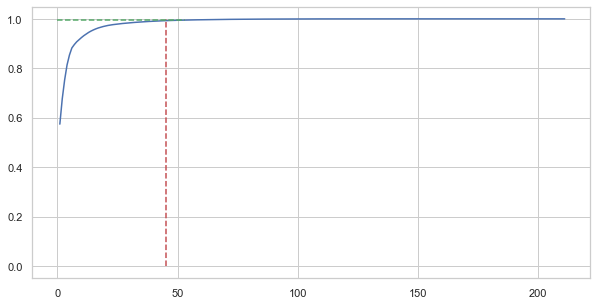

In [156]:
plt.figure(figsize=[10,5])
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=45, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.995, xmax=53, xmin=0, colors="g", linestyles="--")

<B>Observation-: We can observe that almost 100% of the variance can be explained by approx. 45 PCs , hence we will use only first 45 PCs for the sake of diamensionality reduction.</B>

In [157]:
pca=PCA(random_state=42,n_components=45)

In [158]:
pca_X_train=pd.DataFrame(pca.fit_transform(X_train_scaled))
collist=pca_X_train.columns
column_list=['PCA'+str(i) for i in collist ]
pca_X_train.columns=column_list
pca_X_train.head()

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0 -0.685704 -0.149457 -0.054889 -0.004911 -0.132173  0.290246 -0.001507   
1 -0.568938  0.825799  0.155355 -0.029359 -0.008518 -0.088864 -0.099710   
2  2.259919  0.641066  0.113850  0.032770  0.036901  0.350423 -0.040432   
3 -0.560214  0.978393  0.176021 -0.041511 -0.030085 -0.301404  0.079535   
4  2.116504 -0.479555 -0.101077  0.043332 -0.048059 -0.103455  0.014694   

       PCA7      PCA8      PCA9  ...     PCA35     PCA36     PCA37     PCA38  \
0  0.002477  0.025185 -0.000899  ... -0.004821  0.012054 -0.002628  0.007549   
1 -0.012509 -0.025319 -0.018848  ... -0.041371  0.042933  0.009888 -0.004849   
2 -0.009828  0.063941  0.017023  ...  0.111191 -0.011005  0.006305 -0.035515   
3 -0.043663  0.443206  0.043035  ... -0.007625  0.019724  0.035983 -0.017854   
4 -0.008904  0.056206 -0.000027  ... -0.012871 -0.014792  0.001624  0.007791   

      PCA39     PCA40     PCA41     PCA42     PCA43     PCA44  
0  0.003411  0.010134  0.008146 -0.004955 -0.000210  0.002341  
1  0.007143  0.025320  0.015071  0.003088 -0.050756 -0.018081  
2  0.026607 -0.017066  0.014469  0.080822  0.020881 -0.008520  
3  0.002074 -0.000068 -0.022980 -0.031466 -0.021719 -0.008595  
4 -0.008699  0.012629 -0.011311 -0.011840 -0.000216  0.009664  

[5 rows x 45 columns]

In [159]:
pca_X_test=pd.DataFrame(pca.transform(X_test_scaled))
pca_X_test.columns=column_list
pca_X_test.head()

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0 -0.680883 -0.145494 -0.041943 -0.012222 -0.108418 -0.202855 -0.015577   
1  0.249875 -0.082663 -0.995486  0.665461  0.019321 -0.174165 -0.062950   
2 -0.687006 -0.150845 -0.060742 -0.002490 -0.143636  0.449725  0.007316   
3 -0.683169 -0.138384 -0.039984 -0.012535 -0.101270 -0.212842 -0.002149   
4  1.164076 -0.366298  0.002566  1.172523 -0.125113 -0.112999 -0.024556   

       PCA7      PCA8      PCA9  ...     PCA35     PCA36     PCA37     PCA38  \
0 -0.023500  0.032384 -0.010213  ... -0.010858  0.007123 -0.002436 -0.016348   
1 -0.056034 -0.047403 -0.007467  ... -0.004488  0.004220 -0.004048  0.001856   
2  0.011302  0.045158  0.004379  ...  0.003729 -0.003407  0.000298  0.008114   
3 -0.017551  0.059196 -0.002412  ...  0.001126  0.000821  0.001407 -0.007087   
4 -0.009126  0.010950  0.024274  ... -0.001126 -0.018117 -0.035343  0.030969   

      PCA39     PCA40     PCA41     PCA42     PCA43     PCA44  
0 -0.000362  0.008860 -0.002041 -0.005605 -0.009414 -0.002408  
1  0.010124  0.007326  0.001917  0.002014  0.005418  0.009733  
2 -0.007923 -0.001895  0.028267  0.019212  0.015981  0.004424  
3 -0.001914 -0.000419 -0.001631 -0.004794 -0.009959  0.002423  
4 -0.018509  0.009488 -0.006978 -0.011628 -0.003405  0.010528  

[5 rows x 45 columns]

<center><h3>Model building and Evaluation</h3></center>

<U><B> Building a logistic regression model</B></U>

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
Logisticregmodel=LogisticRegression()

In [162]:
Logisticregmodel=Logisticregmodel.fit(pca_X_train,y_train)

In [163]:
predictedprobability=Logisticregmodel.predict_proba(pca_X_test)

In [164]:
from sklearn import metrics

In [165]:
predictedprobability
metrics.roc_auc_score(y_test,predictedprobability[:,1])

0.8783028383580725

<B>Observation-: We can see the accuracy of the model is 87.8% . Let's keep it as a base model accuacy. </B>

<U><B>Building a random forest classifier</B></U>

In [166]:
from sklearn.ensemble import RandomForestClassifier

<B>Consideration-: We have used the hyper parameters mentioned below for Gridsearch cross validation technique and obtained the optimal hyper parameters , for the sake of time reduction while restarting the kernel after changes in analysis we commented the hyperparameter tunning. As we found our optimal parameter once and using it to build model.</B><br>
<br>
<center>*hyperparameters={'n_estimators':[50,100,200],<br>
                'max_depth':[5,6,7],<br>
                'min_samples_split':[50,100,150],<br>
                'min_samples_leaf':[50,100,150],<br>
                'max_features':[5,10,15]}<br>
*folds=4<br>
*gridsearch_model=GridSearchCV(estimator=randomforestclassifier,param_grid=hyperparameters,verbose=1,<br>
                              cv=folds,n_jobs=-1,scoring='accuracy')<br></center>


<B>Observation-:After HPT we have found ot the best_estimator_ as the following and moved with it for model evaluation.</B>

In [167]:
randomforestC=RandomForestClassifier(max_depth=7, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=750, n_jobs=-1,
                       random_state=42)

In [168]:
randomforestC.fit(pca_X_train,y_train)

RandomForestClassifier(max_depth=7, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=750, n_jobs=-1,
                       random_state=42)

In [169]:
predicted_classes=randomforestC.predict(pca_X_test)

In [170]:
metrics.accuracy_score(y_test,predicted_classes)

0.9159285714285714

<B>Observation-: We can see a significant increment on accuracy than the logistic regression model . As our acuuracy score is approx. 91.5% </B>

<U><B>Building a Adaptive boosting model</B></U>

In [173]:
from sklearn.ensemble import AdaBoostClassifier

<B>Consideration-: We have used the hyper parameters mentioned below for Gridsearch cross validation technique and obtained the optimal hyper parameters , for the sake of time reduction while restarting the kernel after changes in analysis we commented the hyperparameter tunning. As we found our optimal parameter once and using it to build model.</B><br>

<center>model=AdaBoostClassifier(random_state=42)<br>
hyperparameters={'n_estimators':[50,100,200],'learning_rate':[0.1,0.2,0.5,0.7,1.0]}<br></center>

<center>folds=5<br></center>

<center>gridsearch_model=GridSearchCV(estimator=model,param_grid=hyperparameters,cv=folds,scoring='accuracy',verbose=1,n_jobs=-1)<br></center>

<center>gridsearch_model.fit(pca_Xtrain,Ytrain)<br></center>

<center>best_model=gridsearch_model.best_estimator_<br>
best_model.fit(pca_Xtrain,Ytrain)<br>
predicted_classes=best_model.predict(pca_Xtest)<br>
metrics.accuracy_score(Ytest,predicted_classes)<br></center>

<center>best_model<br></center>

<center>AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)<br></center>

<B>Observation-:After HPT we have found ot the best_estimator_ as the following and moved with it for model evaluation.</B>

In [174]:
ada_model=AdaBoostClassifier(learning_rate=0.5, n_estimators=750, random_state=42)
ada_model.fit(pca_X_train,y_train)

predicted_classes=ada_model.predict(pca_X_test)
metrics.accuracy_score(y_test,predicted_classes)

0.9132857142857143

<B>Observation-: We can see a significant increment on accuracy than the logistic regression model but simmilar accuracy score with random forest classifier  . As our acuuracy score is approx. 91.5%</B>

<U><B>Building a Gradient boosting machine</B></U>

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

<B>Consideration-: We have used the hyper parameters mentioned below for Gridsearch cross validation technique and obtained the optimal hyper parameters , for the sake of time reduction while restarting the kernel after changes in analysis we commented the hyperparameter tunning. As we found our optimal parameter once and using it to build model.</B><br>
<center>
model=GradientBoostingClassifier(random_state=42)<br>
hyperparameters={'n_estimators':[100,200],'learning_rate':[0.2,0.5,0.7],'max_depth':[6,7],<br>
'min_samples_split':[100,150],<br>
'min_samples_leaf':[100,150],<br>
'max_features':[10,15]}<br></center>

<center>gridsearch_model=GridSearchCV(estimator=model,param_grid=hyperparameters,cv=folds,scoring='accuracy',verbose=1,n_jobs=-1)<br></center>

<center>gridsearch_model.fit(pca_Xtrain,Ytrain)<br></center>

<center>best_model=gridsearch_model.best_estimator_<br>
best_model.fit(pca_Xtrain,Ytrain)<br>
predicted_classes=best_model.predict(pca_Xtest)<br>
metrics.accuracy_score(Ytest,predicted_classes)<br></center>

<center>best_model</center>

<center>GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features=15,<br>
                           min_samples_leaf=100, min_samples_split=100,<br>
                           random_state=42)<br></center>

<B>Observation-:After HPT we have found ot the best_estimator_ as the following and moved with it for model evaluation.</B>

In [176]:
best_model_gbm=GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features=15,
                           min_samples_leaf=100, min_samples_split=100,
                           random_state=42)
best_model_gbm.fit(pca_X_train,y_train)
predicted_classes=best_model_gbm.predict(pca_X_test)
metrics.accuracy_score(y_test,predicted_classes)

0.9162857142857143

<B>Observation-: We can see a significant increment on accuracy than the logistic regression model but simmilar accuracy score with random forest classifier and adaptive boosting machine . As our acuuracy score is approx. 91.5%</B>

<U><B>Building an Extreme Gradient boosting machine</B></U>

In [177]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

<B>Consideration-: We have used the hyper parameters mentioned below for Gridsearch cross validation technique and obtained the optimal hyper parameters , for the sake of time reduction while restarting the kernel after changes in analysis we commented the hyperparameter tunning. As we found our optimal parameter once and using it to build model.</B><br>

<center>model=XGBClassifier(random_state=42,n_jobs=-1)</center>

<center>hyperparameter={<br>
        'n_estimators' : [100, 200], # no of trees<br> 
        'learning_rate' : [0.01, 0.02, 0.05],  # eta<br>
        'min_child_weight': [1, 5, 7],<br>
        'gamma': [0.1, 0.5, 1],<br>
        'subsample': [0.6, 0.8],<br>
        'colsample_bytree': [0.6, 0.8],<br>
        'max_depth': [ 5,6]<br>
        }<br>
gridsearch_model=GridSearchCV(estimator=model,param_grid=hyperparameter,cv=4,scoring='accuracy',verbose=1,n_jobs=-1)<br>
</center>

<center>gridsearch_model.fit(pca_Xtrain,Ytrain)<br></center>

<center>best_model=gridsearch_model.best_estimator_<br>
best_model.fit(pca_Xtrain,Ytrain)<br>
predicted_classes=best_model.predict(pca_Xtest)<br>
metrics.accuracy_score(Ytest,predicted_classes)<br></center>

<B>Observation-:After HPT we have found ot the best_estimator_ as the following and moved with it for model evaluation.</B>

In [178]:
Xgbmodel=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)
Xgbmodel.fit(pca_X_train,y_train)
predicted_classes=Xgbmodel.predict(pca_X_test)
metrics.accuracy_score(y_test,predicted_classes)

[20:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9198571428571428

<B>Observation-: We can see a significant increment on accuracy than other models . As our acuuracy score is approx. 92.1%</B>

<U><B>Buildin a support vector machine</B></U>

First we are checking whether a linear or non-linear kernel will perform better on the data

In [179]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')

In [180]:
svm_model.fit(pca_X_train,y_train)

SVC(kernel='linear')

In [181]:
pca_X_test.shape

(14000, 45)

In [182]:
predicted_classes=svm_model.predict(pca_X_test)
metrics.accuracy_score(y_test,predicted_classes)

0.9097142857142857

In [183]:
svm_r_model=SVC(kernel='rbf')
svm_r_model.fit(pca_X_train,y_train)

SVC()

In [184]:
predicted_classes=svm_r_model.predict(pca_X_test)
metrics.accuracy_score(y_test,predicted_classes)

0.9162857142857143

<B>Observation-: As we can see the support vector machine with non-linear kernel is performing better in terms of accuracy</B>

<B>Consideration-: We have used the hyper parameters mentioned below for Gridsearch cross validation technique and obtained the optimal hyper parameters , for the sake of time reduction while restarting the kernel after changes in analysis we commented the hyperparameter tunning. As we found our optimal parameter once and using it to build model.</B><br>

<center>hyperparameter={<br>
'C': [0.1,1,10,100,1000], # no of trees<br>
'gamma' : [1, 0.1, 0.01,0.001,0.0001], # eta<br>
}<br>
model=SVC(kernel='rbf',random_state=42)<br>
gridsearch_model=GridSearchCV(estimator=model,param_grid=hyperparameter,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)<br></center>

<center>gridsearch_model.fit(pca_Xtrain,Ytrain)<br>
best_model=gridsearch_model.best_estimator_<br>
best_model.fit(pca_Xtrain,Ytrain)<br>
predicted_classes=best_model.predict(pca_Xtest)<br>
metrics.accuracy_score(Ytest,predicted_classes)<br></center>

In [185]:
svm_r_model=SVC(C=1, gamma=0.1, random_state=42)

In [186]:
svm_r_model.fit(pca_X_train,y_train)

SVC(C=1, gamma=0.1, random_state=42)

In [187]:
predicted_classes=svm_r_model.predict(pca_X_test)
metrics.accuracy_score(y_test,predicted_classes)

0.9112857142857143

<B>Observation-: We can see a significant increment on accuracy than the logistic regression model but simmilar accuracy score with random forest classifier and adaptive boosting machine , and gradient boosting machine. As our acuuracy score is approx. 91.1%</B>

<center><h2>Predictions of unseen test data</h2></center>

In [188]:
testdf = pd.read_csv("test.csv")

In [189]:
testdf.shape

(30000, 171)

In [190]:
testdf.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [191]:
id_test = testdf['id']

In [192]:

col_list = ['id','circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']

In [193]:
col_list

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8']

In [194]:

testdf = testdf.drop(col_list, axis=1)
testdf.shape

(30000, 157)

In [195]:

testdf.loc[testdf['date_of_last_rech_6'].notnull(), 'date_of_last_rech_6'] = 1
testdf.loc[testdf['date_of_last_rech_6'].isnull(), 'date_of_last_rech_6'] = 0
testdf.loc[testdf['date_of_last_rech_7'].notnull(), 'date_of_last_rech_7'] = 1
testdf.loc[testdf['date_of_last_rech_7'].isnull(), 'date_of_last_rech_7'] = 0
testdf.loc[testdf['date_of_last_rech_8'].notnull(), 'date_of_last_rech_8'] = 1
testdf.loc[testdf['date_of_last_rech_8'].isnull(), 'date_of_last_rech_8'] = 0
testdf.loc[testdf['date_of_last_rech_data_6'].notnull(), 'date_of_last_rech_data_6'] = 1
testdf.loc[testdf['date_of_last_rech_data_6'].isnull(), 'date_of_last_rech_data_6'] = 0
testdf.loc[testdf['date_of_last_rech_data_7'].notnull(), 'date_of_last_rech_data_7'] = 1
testdf.loc[testdf['date_of_last_rech_data_7'].isnull(), 'date_of_last_rech_data_7'] = 0
testdf.loc[testdf['date_of_last_rech_data_8'].notnull(), 'date_of_last_rech_data_8'] = 1
testdf.loc[testdf['date_of_last_rech_data_8'].isnull(), 'date_of_last_rech_data_8'] = 0

In [196]:

a = testdf.isnull().sum()*100/len(testdf) # calculate percent of missing data in each column
a[a>0]
col_list = list(a[a>0].index.values)
testdf[col_list] = testdf[col_list].fillna(value=0, axis=1)


In [197]:
testdf.isnull().sum()*100/len(testdf)

arpu_6         0.0
arpu_7         0.0
arpu_8         0.0
onnet_mou_6    0.0
onnet_mou_7    0.0
              ... 
fb_user_8      0.0
aon            0.0
aug_vbc_3g     0.0
jul_vbc_3g     0.0
jun_vbc_3g     0.0
Length: 157, dtype: float64

In [198]:
testdf[categorical_columns]

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0                       1                   1                   1   
1                       1                   1                   1   
2                       1                   1                   1   
3                       1                   1                   1   
4                       1                   1                   1   
...                   ...                 ...                 ...   
29995                   1                   1                   1   
29996                   1                   1                   1   
29997                   1                   1                   1   
29998                   1                   1                   1   
29999                   1                   1                   1   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
29995                        1                        0   
29996                        0                        1   
29997                        0                        0   
29998                        0                        0   
29999                        1                        1   

      date_of_last_rech_data_8  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
29995                        0  
29996                        0  
29997                        0  
29998                        0  
29999                        1  

[30000 rows x 6 columns]

In [199]:
testdf[categorical_columns] = testdf[categorical_columns].astype('float')

In [200]:
testdf['total_monthly_freq'] = testdf['date_of_last_rech_6']+testdf['date_of_last_rech_7']+testdf['date_of_last_rech_8']

In [201]:

testdf['total_amt'] = testdf['total_rech_amt_6']+testdf['total_rech_data_6']+testdf['total_rech_amt_7']+testdf['total_rech_data_7']+testdf['total_rech_amt_8']+testdf['total_rech_data_8']

testdf['high_value_customer'] = np.where(testdf['total_amt'] > testdf['total_amt'].quantile(0.75), 1 , 0)

In [202]:
testdf.shape

(30000, 160)

In [203]:
numeric_columns=list(testdf.describe().columns)
colset=set()
three_months_kpi=[i for i in numeric_columns if i[-1] in ['6','7','8']]
three_months_kpi
for i in three_months_kpi:
    colset.add(i[:-2])
len(colset)

51

In [204]:

for j in colset:
    testdf[j]=0
    for i in ['6','7','8']:
        testdf[j]=testdf[j]+testdf[j+'_'+i]


In [205]:
testdf.shape

(30000, 211)

In [206]:

X_test_scaled = pd.DataFrame(data=rs.transform(testdf), columns=testdf.columns)

In [207]:

pca_X_TEST=pd.DataFrame(pca.transform(X_test_scaled))
pca_X_TEST.columns=column_list
pca_X_TEST.head()

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0 -0.685528 -0.167634 -0.053947 -0.006949 -0.121125  0.115048 -0.021766   
1 -0.573337  0.824876  0.145805 -0.023680 -0.021318  0.330204 -0.107298   
2 -0.570311  0.750051  0.145015 -0.031244  0.014914 -0.216605 -0.196517   
3 -0.680715 -0.146572 -0.047685 -0.008889 -0.121859  0.042080 -0.036384   
4 -0.574945  0.811054  0.155415 -0.031699  0.010383 -0.217929 -0.096465   

       PCA7      PCA8      PCA9  ...     PCA35     PCA36     PCA37     PCA38  \
0 -0.000201 -0.004119 -0.006860  ...  0.000165  0.000433 -0.000084  0.002937   
1  0.014837 -0.100923 -0.013512  ...  0.016072 -0.007682 -0.010619 -0.031117   
2  0.012604 -0.232315 -0.031501  ... -0.014242 -0.004563 -0.010254  0.002864   
3 -0.015347 -0.053118 -0.014673  ... -0.015314 -0.014674  0.004511  0.007240   
4  0.001948 -0.004988 -0.006404  ... -0.017058  0.010558 -0.008605 -0.009719   

      PCA39     PCA40     PCA41     PCA42     PCA43     PCA44  
0  0.001712  0.007449  0.005308 -0.003495 -0.003337 -0.000039  
1  0.003167 -0.021739 -0.008709 -0.004813  0.003437 -0.008367  
2 -0.067545 -0.043306 -0.007967 -0.036260 -0.008444  0.002065  
3 -0.007895  0.013994  0.001334  0.005625  0.002734 -0.000229  
4 -0.003734  0.003925 -0.009661  0.004606 -0.021646  0.004153  

[5 rows x 45 columns]

<U><B>Let's predict the final TEST data with XGBoost classifier</B></U>

In [208]:
predicted_classes = Xgbmodel.predict(pca_X_TEST)
predicted_classes.shape

(30000,)

In [209]:
xgb_pred = pd.DataFrame(list(zip(list(id_test), list(predicted_classes))), columns=["id", "churn_probability"])
xgb_pred.describe()

id  churn_probability
count  30000.000000       30000.000000
mean   84998.500000           0.089833
std     8660.398374           0.285948
min    69999.000000           0.000000
25%    77498.750000           0.000000
50%    84998.500000           0.000000
75%    92498.250000           0.000000
max    99998.000000           1.000000

In [210]:
xgb_pred.to_csv('xgb_pred.csv', index=False)

<B><U> Let's predict the final TEST data with random forest classifier </U></B>

In [211]:
predicted_classes_rf= randomforestC.predict(pca_X_TEST)

In [212]:
predicted_classes_rf.shape

(30000,)

In [213]:
rf_pred = pd.DataFrame(list(zip(list(id_test), list(predicted_classes_rf))), columns = ["id","churn_probability"])

In [214]:
rf_pred.describe()

id  churn_probability
count  30000.000000        30000.00000
mean   84998.500000            0.04910
std     8660.398374            0.21608
min    69999.000000            0.00000
25%    77498.750000            0.00000
50%    84998.500000            0.00000
75%    92498.250000            0.00000
max    99998.000000            1.00000

In [215]:
rf_pred.to_csv('rf_pred.csv', index=False)

<B><U>Let's predict the final TEST data with SVM classifier</U></B>

In [216]:
predicted_classes_svm = svm_r_model.predict(pca_X_TEST)
predicted_classes_svm.shape

(30000,)

In [217]:
svm_pred = pd.DataFrame(list(zip(list(id_test), list(predicted_classes_svm))), columns=["id", "churn_probability"])
svm_pred.describe()

id  churn_probability
count  30000.000000       30000.000000
mean   84998.500000           0.047100
std     8660.398374           0.211856
min    69999.000000           0.000000
25%    77498.750000           0.000000
50%    84998.500000           0.000000
75%    92498.250000           0.000000
max    99998.000000           1.000000

In [218]:
svm_pred.to_csv('svm_pred2.csv', index=False)